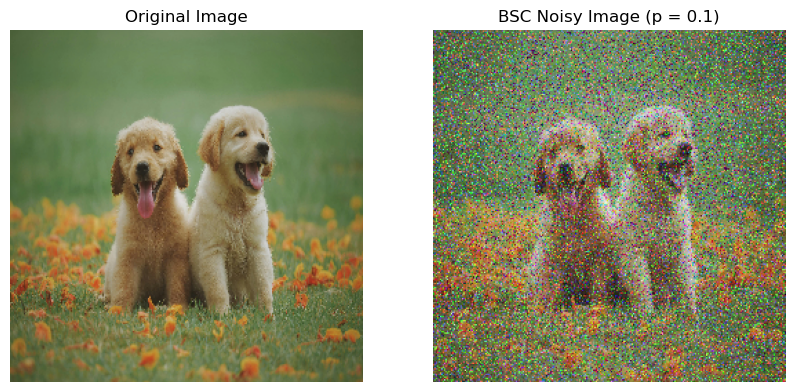

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_bsc_to_image(image, flip_probability):
    """
    Applies Binary Symmetric Channel (BSC) noise to a grayscale or RGB image.
    Each bit of each pixel is flipped with probability `flip_probability`.
    """
    # Convert image to 8-bit binary representation
    flat_image = image.flatten()
    binary = np.unpackbits(flat_image)

    # Generate random flip mask (1 = flip, 0 = keep)
    flips = np.random.rand(binary.size) < flip_probability

    # Flip the bits
    noisy_binary = np.bitwise_xor(binary, flips.astype(np.uint8))

    # Repack bits into 8-bit integers
    noisy_image_flat = np.packbits(noisy_binary)

    # Reshape to original shape
    noisy_image = noisy_image_flat.reshape(image.shape)
    return noisy_image

# Load an image (make sure it’s 8-bit grayscale or RGB)
image = cv2.imread('dog.jpeg')  # or 'your_image.jpg'
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

# Optional: resize for faster processing
image = cv2.resize(image, (256, 256))

# Apply BSC noise with a flip probability (e.g., 0.01 for 1%)
flip_probability = 0.1
noisy_image = apply_bsc_to_image(image, flip_probability)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title(f"BSC Noisy Image (p = {flip_probability})")
plt.axis('off')

plt.show()
